<a href="https://colab.research.google.com/github/kanchanakanta/python-notebooks/blob/main/Apollo_Hospitals_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv"

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv
To: /content/scaler_apollo_hospitals.csv
100% 53.0k/53.0k [00:00<00:00, 115MB/s]


# **Apollo Hospitals Project**

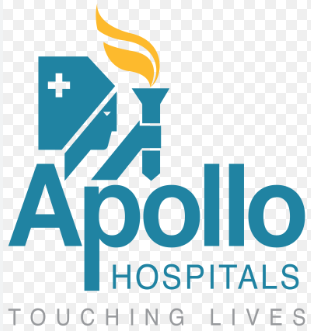

In [ ]:
import pandas as pd
import numpy as np 
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("scaler_apollo_hospitals.csv")

In [ ]:
df.head(10)

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
5,5,31,female,no,southeast,8.58,0,9392
6,6,46,female,no,southeast,11.15,1,20601
7,7,37,female,no,northwest,9.25,3,18204
8,8,37,male,no,northeast,9.94,2,16016
9,9,60,female,no,northwest,8.61,0,72308


In [ ]:
df=df.drop("Unnamed: 0",axis=1)
df

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


## **1) Basic data cleaning and exploration:**

In [ ]:
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges'],
      dtype='object')

In [ ]:
df.dtypes

age                          int64
sex                         object
smoker                      object
region                      object
viral load                 float64
severity level               int64
hospitalization charges      int64
dtype: object

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info() # all datatypes are correctly identified good to go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isna().sum() # No missing values good to go

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

### **Univariate Analysis**

In [ ]:
df["age"].unique() # data given for 18+ age group and till age 64

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [ ]:
df["age"].value_counts(bins=5)

(17.953, 27.2]    362
(45.6, 54.8]      258
(54.8, 64.0]      242
(36.4, 45.6]      239
(27.2, 36.4]      237
Name: age, dtype: int64

In [ ]:
df["age"].median()

39.0

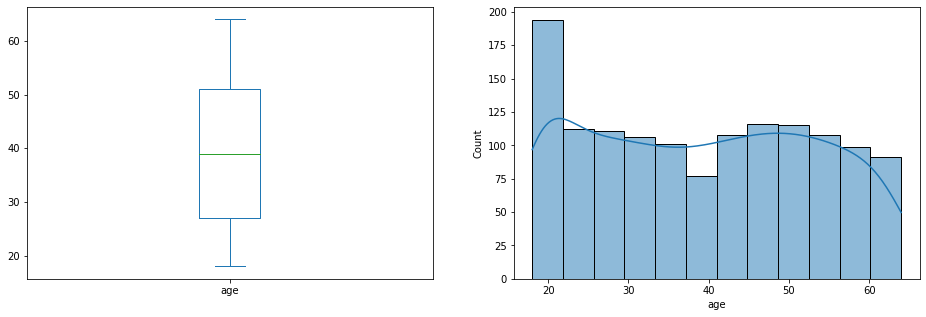

In [ ]:
plt.subplot(121)
df["age"].plot.box(figsize=(16,5))    # Median is at 39
plt.subplot(122)                       # age data is not normaly distributed
sns.histplot(df["age"], kde=True)       # no outlier prent means data is valid with age column
plt.show() 

In [ ]:
df["sex"].unique() # third gender information not given

array(['female', 'male'], dtype=object)

In [ ]:
df["sex"].value_counts() # data for both female and male count given almost same

male      676
female    662
Name: sex, dtype: int64

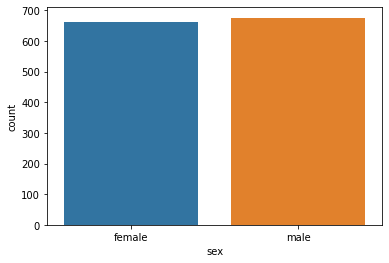

In [ ]:
sns.countplot(data=df,x="sex") # Visual representation of the above code
plt.show()

In [ ]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df["smoker"].value_counts() # non smoker are more than smoker

no     1064
yes     274
Name: smoker, dtype: int64

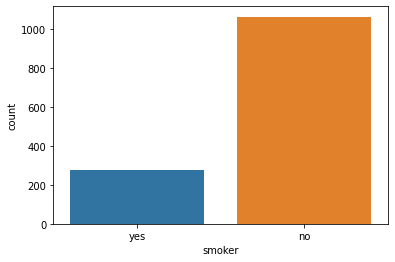

In [ ]:
sns.countplot(data=df,x="smoker") # Visual representation of the above code
plt.show()

In [ ]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df["region"].value_counts()  # southeast datainformation given is more
                             # all region information given is almost equal

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

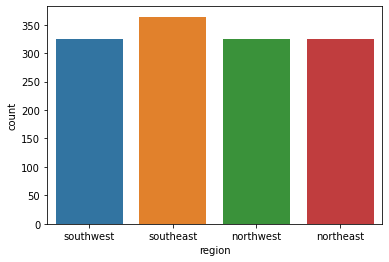

In [ ]:
sns.countplot(data=df,x="region") # Visual representation of the above code
plt.show()

In [ ]:
df["viral load"].value_counts(bins=10)

(9.037, 10.276]                319
(10.276, 11.515]               288
(7.798, 9.037]                 234
(11.515, 12.754]               195
(6.559, 7.798]                 127
(12.754, 13.993]                96
(13.993, 15.232]                32
(5.3069999999999995, 6.559]     30
(15.232, 16.471]                14
(16.471, 17.71]                  3
Name: viral load, dtype: int64

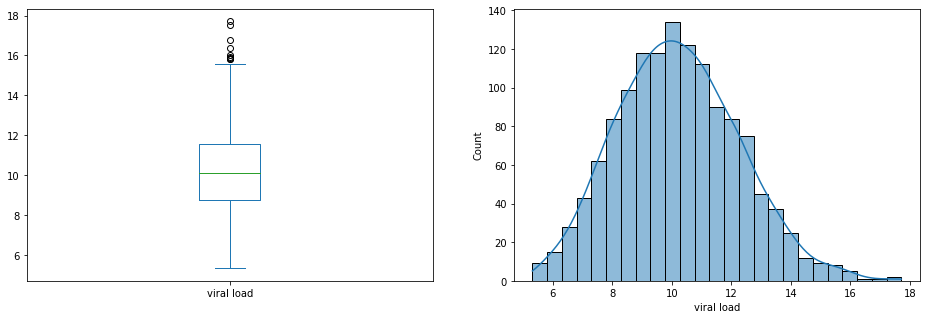

In [ ]:
plt.subplot(121)
df["viral load"].plot.box(figsize=(16,5))    # Median is at 10
plt.subplot(122)                             # viral load data is normaly distributed
sns.histplot(df["viral load"], kde=True)     # outlier present in viral load
plt.show() 

In [ ]:
df["severity level"].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
df["severity level"].value_counts() # Maximum severity level is 0 and second is 1

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

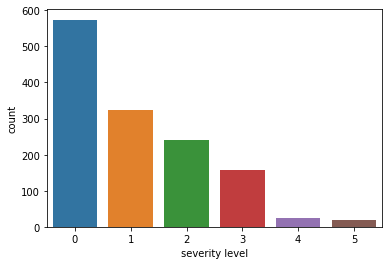

In [ ]:
sns.countplot(data=df,x="severity level") # Visual representation of the above code
plt.show()

In [ ]:
df["hospitalization charges"].value_counts(bins=10)

(2648.3779999999997, 18467.1]    536
(18467.1, 34129.2]               398
(34129.2, 49791.3]               129
(49791.3, 65453.4]                86
(81115.5, 96777.6]                58
(96777.6, 112439.7]               58
(65453.4, 81115.5]                35
(112439.7, 128101.8]              32
(143763.9, 159426.0]               4
(128101.8, 143763.9]               2
Name: hospitalization charges, dtype: int64

In [ ]:
df["hospitalization charges"].median()

23455.0

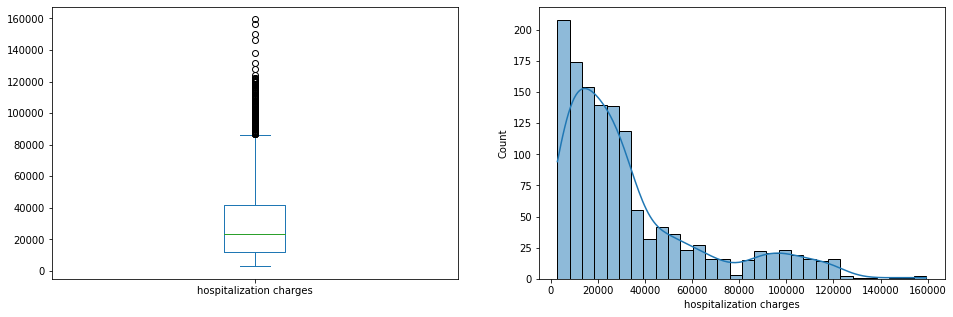

In [ ]:
plt.subplot(121)
df["hospitalization charges"].plot.box(figsize=(16,5))    # Median is at 23455
plt.subplot(122)                                          # hospitalization charges data is right skewed distributed.
sns.histplot(df["hospitalization charges"], kde=True)     # outlier present in hospitalization charges
plt.show()

## **Handle the outliers using the IQR method**

In [ ]:
df.describe()  # viral load and hospitalization charges prent outliers 

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [ ]:
columns_having_outlier=['viral load', 'hospitalization charges']
for col in columns_having_outlier:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  print(IQR)
  lower_limit=Q1 - 1.5*IQR
  Upper_limit=Q3 + 1.5*IQR 
  print(lower_limit,Upper_limit)
  df=df[(df[col]>lower_limit) & (df[col]<Upper_limit)]

2.8050000000000015
4.554999999999997 15.775000000000002
29620.0
-32584.0 85896.0


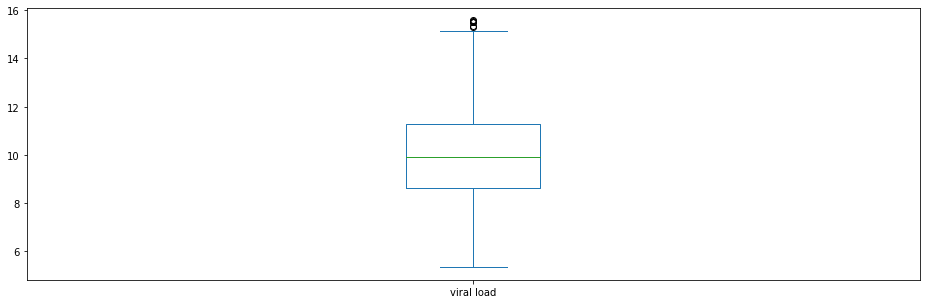

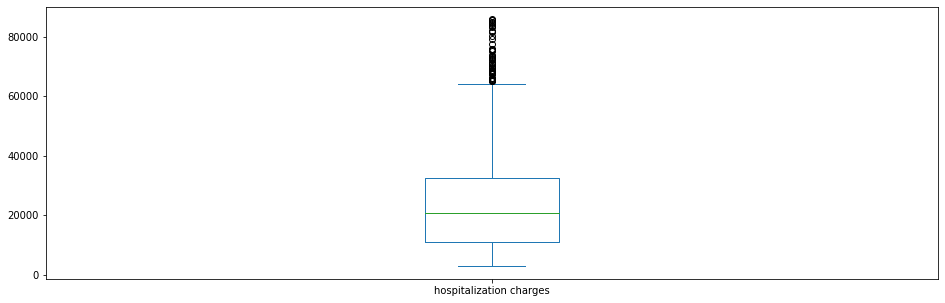

In [ ]:
# Visual reprentation of outlier removed data # some datasets still presents outliers 
for col in columns_having_outlier:
  df[col].plot.box(figsize=(16,5))
  plt.show()

In [ ]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1191.000000,1191.000000,1191.000000,1191.000000
mean,39.010915,9.997960,1.087322,24752.761545
std,14.056634,1.956954,1.216455,17968.444708
min,18.000000,5.320000,0.000000,2805.000000
25%,26.000000,8.600000,0.000000,11022.000000
50%,39.000000,9.900000,1.000000,20868.000000
75%,51.000000,11.260000,2.000000,32384.000000
max,64.000000,15.580000,5.000000,85758.000000


In [ ]:
df.describe(include=["object"])

,sex,smoker,region
count,1191,1191,1191
unique,2,2,4
top,female,no,northwest
freq,610,1055,305


## **Bivariate Analysis**

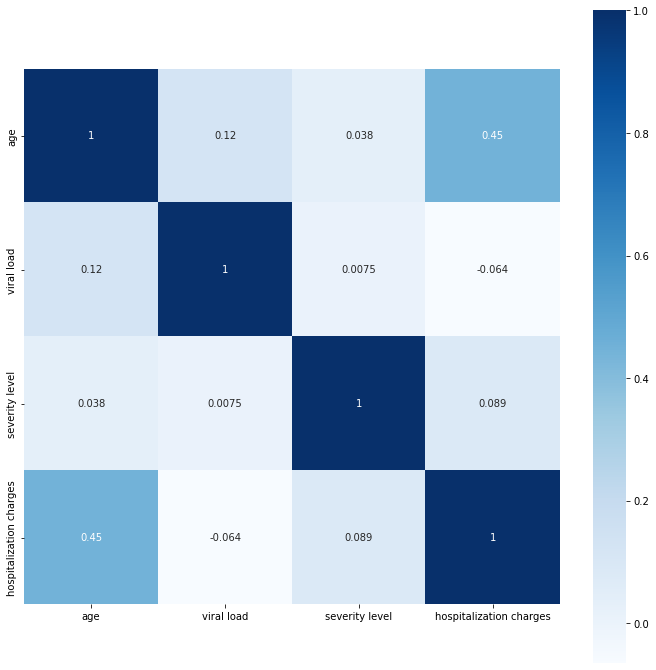

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(method='pearson'), square=True,annot=True, cmap="Blues")

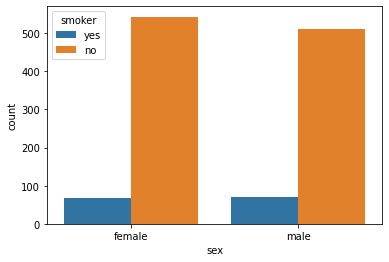

In [ ]:
sns.countplot(x="sex",hue="smoker",data=df) # smoker count of male and female is almost same
                                            # nonsmoker count for both female and male is high

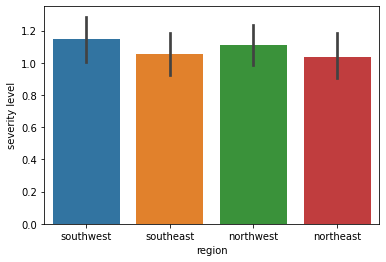

In [ ]:
sns.barplot(x="region",y="severity level",data=df,estimator=np.mean) # all region severity level is lie between 1 to 2 

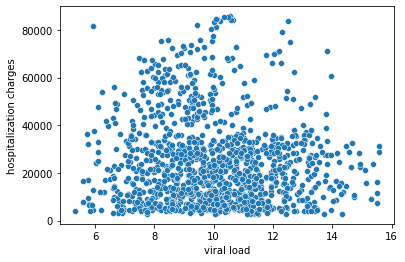

In [ ]:
sns.scatterplot(x="viral load",y="hospitalization charges",data=df) # from scatter plot we can say viral load and 
                                                                    # hopitalization charges not correlated with each other.

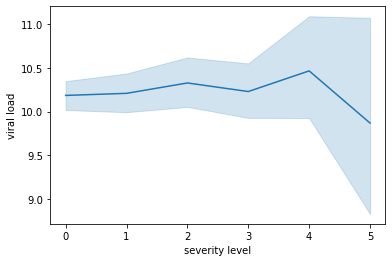

In [ ]:
sns.lineplot(x="severity level",y="viral load",data=df) # When Severity level 0 to 3 then the viral load is lie between 10 to 10.5

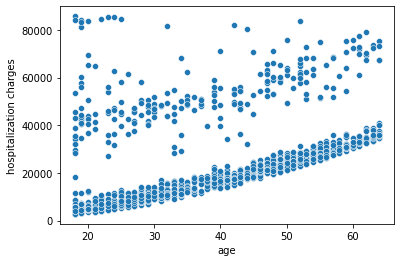

In [ ]:
sns.scatterplot(x="age",y="hospitalization charges",data=df) # age and hospitalization charges correlated with each othe.

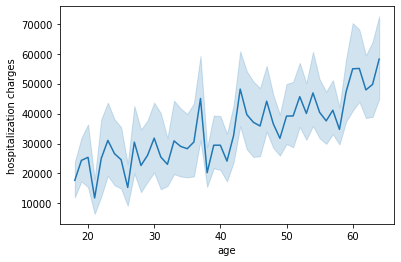

In [ ]:
sns.lineplot(x="age",y="hospitalization charges",data=df) # Age and hospitalization charges are positively correlated with each other.

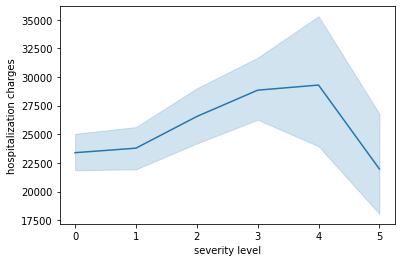

In [ ]:
sns.lineplot(x="severity level",y="hospitalization charges",data=df) # From line graph we can say if severity level is 
                                                                     # 3 or 4 then hospitalization charges is high.
                                                                     # hospitalization charges is low at 0,1 and 5

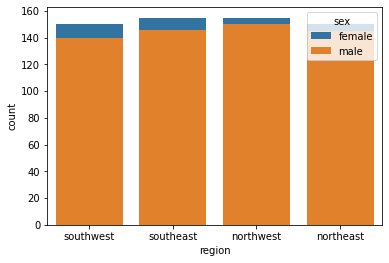

In [ ]:
sns.countplot(data=df,x="region",hue="sex", dodge=False)

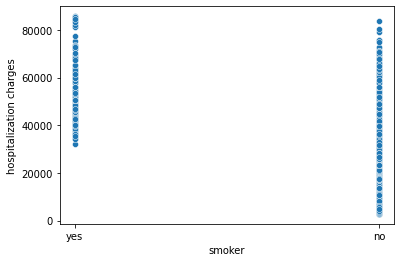

In [ ]:
sns.scatterplot(x="smoker",y="hospitalization charges",data=df) # Smokers spend more hospitalization charges 

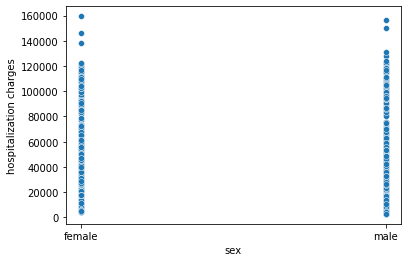

In [ ]:
sns.scatterplot(x="sex",y="hospitalization charges",data=df) # Hospitalization charges for both female and male is almost same.

## **Mulativariate Analysis**

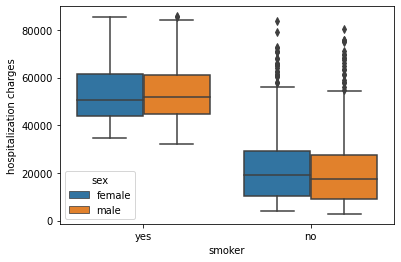

In [ ]:
sns.boxplot(x="smoker",hue="sex",data=df,y="hospitalization charges",dodge=True)
# Smokers female and male count is almost same and they spend almost 60k-80k on hospitalization charges.
# Non-smokers female count is more than male and the spen 10k-50k on hospitalization charges.
# Smoker spend more on hospitalization charges

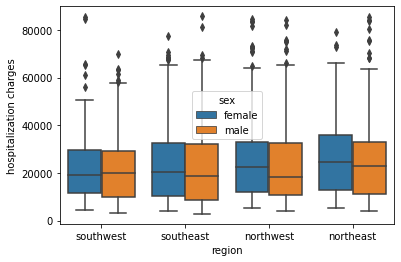

In [ ]:
sns.boxplot(x="region",hue="sex",data=df,y="hospitalization charges",dodge=True)

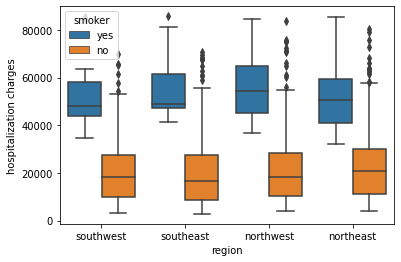

In [ ]:
sns.boxplot(x="region",hue="smoker",data=df,y="hospitalization charges",dodge=True)
# Northwest smoker spend more on hospitalization charges.
# All region smokers spend more on hospitalization charges.

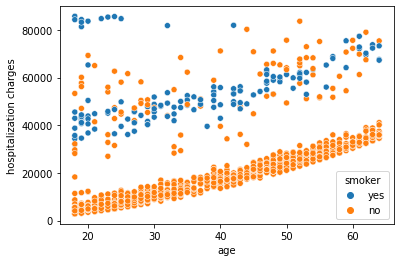

In [ ]:
sns.scatterplot(x="age",y="hospitalization charges",hue="smoker",data=df) 
# blue dots represnts the smoker count spending on hosptalization charges and which is above 20k

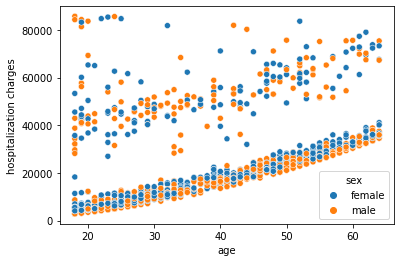

In [ ]:
sns.scatterplot(x="age",y="hospitalization charges",hue="sex",data=df) # hospitalizatio charges and age are possitively corelated.

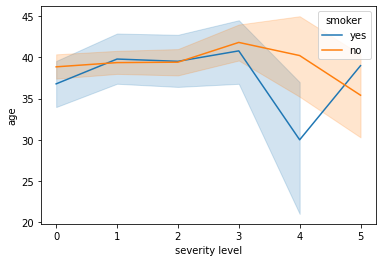

In [ ]:
sns.lineplot(x="severity level",y="age",hue='smoker',data=df)
# severity level is at 3 for smoker at the age of between 25-30
# 40+ age smoker and non smoker has sevirity level 0 to 3.

# **Statistical Analysis**

## **Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)**

In [ ]:
#H0: The hospitalization of people who do smoking is less.
#H1: The hospitalization of people who do smoking is greater.

In [ ]:
smoker=df[df["smoker"]=='yes']["hospitalization charges"]
nonsmoker=df[df["smoker"]=='no']["hospitalization charges"]

In [ ]:
print("smoker length:",len(smoker))
print("non-smoker length:",len(nonsmoker))

smoker length: 136
non-smoker length: 1055


In [ ]:
print("smoker mean:",round(smoker.mean(),2))
print("non-smoker mean:",round(nonsmoker.mean(),2))

smoker mean: 54578.15
non-smoker mean: 20907.97


In [ ]:
from scipy.stats import ttest_ind
#H0: smoker mean is equal to nonsmoker mean
#H1: smoker mean is greater than nonsmoker mean
p_value=ttest_ind(smoker, nonsmoker, alternative="greater")[1] # right tailed t_test
print("p_value:",p_value)

p_value: 7.626446732206901e-116


In [ ]:
# alpha is 0.05 significant value
if p_value < 0.05:
    print("Reject the null hypothesis H0")
    print("Hence, Sastically proven that the hospitalization of people who do smoking is greater than those who don't.")
else:
  print("fail to reject the null hypothesis H0")
  print("Hence, Sastically proven that the hospitalization of people who do smoking is less than those who don't.")

Reject the null hypothesis H0
Hence, Sastically proven that the hospitalization of people who do smoking is greater than those who don't.


## **Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)**

In [ ]:
# H0: The viral load of females is not different from that of males.
# H1: The viral load of females is different from that of males.

In [ ]:
VL_female=df[df["sex"]=='female']["viral load"]
VL_male=df[df["sex"]=='male']['viral load']

In [ ]:
print("Viral load female count:",len(VL_female))
print("Viral load male count:",len(VL_male))

Viral load female count: 610
Viral load male count: 581


In [ ]:
print("Viral load female mean:",round(VL_female.mean(),2))
print("Viral load male mean:",round(VL_male.mean(),2))

Viral load female mean: 9.97
Viral load male mean: 10.03


In [ ]:
from scipy.stats import ttest_ind
#H0: VL_female mean is equal to VL_male mean
#H1: VL_female mean is not equal to VL_male mean
p_value=ttest_ind(VL_female,VL_male)[1] # two tailed t_test
print("p_value:",p_value)

p_value: 0.5704364600211779


In [ ]:
# alpha is 0.05 significant value
if p_value < 0.05:
    print("Reject the null hypothesis H0")
    print("Hence, statistical evidence that the viral load of females is different from that of males.")
else:
  print("Fail to reject the null hypothesis H0")
  print("Hence, statistical evidence that the viral load of females is not different from that of males.")

Fail to reject the null hypothesis H0
Hence, statistical evidence that the viral load of females is not different from that of males.


## **Is the proportion of smoking significantly different across different regions? (Chi-square)**

In [ ]:
df_smoking_regions=pd.crosstab(df["smoker"],df["region"])
df_smoking_regions

region,northeast,northwest,southeast,southwest
smoker,,,,
no,256,267,267,265
yes,39,38,34,25


In [ ]:
# H0: The proportion of smoking significantly is not different across the different regions.
# H1: The proportion of smoking significantly different across different regions.

In [ ]:
from scipy.stats import chi2_contingency
chi_stat, p_value, df, exp_freq = chi2_contingency(df_smoking_regions)
print(chi_stat, p_value)

3.5220357595425753 0.31791538258247287


In [ ]:
# alpha is 0.05 significant value
if p_value < 0.05:
    print("Reject the null hypothesis H0")
    print("Hence, The proportion of smoking significantly different across different regions.")
else:
  print("Fail to reject the null hypothesis H0")
  print("Hence, The proportion of smoking significantly is not different across the different regions.")

Fail to reject the null hypothesis H0
Hence, The proportion of smoking significantly is not different across the different regions.


## **Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)**

In [ ]:
df=pd.read_csv("scaler_apollo_hospitals.csv")
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df_women=df[df['sex']=='female']
df_women.head(10)

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
5,31,female,no,southeast,8.58,0,9392
6,46,female,no,southeast,11.15,1,20601
7,37,female,no,northwest,9.25,3,18204
9,60,female,no,northwest,8.61,0,72308
11,62,female,yes,southeast,8.76,0,69522
13,56,female,no,southeast,13.27,0,27727
16,52,female,no,northeast,10.26,1,26993
20,60,female,no,northeast,12.00,0,33072
21,30,female,no,southwest,10.80,1,10374


In [ ]:
severity_0 = df[df["severity level"]==0]["viral load"]
severity_1 = df[df["severity level"]==1]["viral load"]
severity_2 = df[df["severity level"]==2]["viral load"]

In [ ]:
print("severity_0:",severity_0.mean())
print("severity_1:",severity_1.mean())
print("severity_2:",severity_2.mean())

severity_0: 10.183693379790942
severity_1: 10.207561728395062
severity_2: 10.326083333333333


In [ ]:
# Levene test
from scipy.stats import levene

levene_p_value = levene(severity_0,severity_1,severity_2, center='median')[1]
print("levene test p-value", levene_p_value)

levene test p-value 0.3276233575801029


In [ ]:
if levene_p_value>0.05:
  print("Go with the ANOVA Test as sample population is normally distributed")
else:
  print("sample population is not normally distributed")

Go with the ANOVA Test as sample population is normally distributed


In [ ]:
# H0: The mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is different.
# H1: The mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is same.

In [ ]:
from scipy.stats import f_oneway
f_stat,p_value=f_oneway(severity_0,severity_1,severity_2)
print(f_stat,p_value)

0.4160938798650393 0.6597189200969209


In [ ]:
# alpha is 0.05 significant value
if p_value < 0.05:
    print("Reject the null hypothesis H0")
    print("Hence, The mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is same.")
else:
  print("Fail to reject the null hypothesis H0")
  print("Hence, The mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is different.")

Fail to reject the null hypothesis H0
Hence, The mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is different.


In [ ]:
pd.crosstab(index=df["severity level"],columns=df["sex"],margins=True,normalize=True)*100 
# severity level percentage is more for male than female.

sex,female,male,All
severity level,,,
0,21.599402,21.300448,42.899851
1,11.808670,12.406577,24.215247
2,8.893871,9.043348,17.937220
3,5.754858,5.979073,11.733931
4,0.822123,1.046338,1.868460
5,0.597907,0.747384,1.345291
All,49.476831,50.523169,100.000000


In [ ]:
pd.crosstab(index=df["severity level"],columns=df["region"],margins=True,normalize=True)*100 
# severity level percentage of southeast region is more as compare to other regions.

region,northeast,northwest,southeast,southwest,All
severity level,,,,,
0,10.986547,9.865471,11.733931,10.313901,42.899851
1,5.754858,5.530643,7.100149,5.829596,24.215247
2,3.811659,4.932735,4.932735,4.260090,17.937220
3,2.914798,3.437967,2.615845,2.765321,11.733931
4,0.523169,0.448430,0.373692,0.523169,1.868460
5,0.224215,0.074738,0.448430,0.597907,1.345291
All,24.215247,24.289985,27.204783,24.289985,100.000000


In [ ]:
pd.crosstab(index=df["severity level"],columns=df["smoker"],margins=True,normalize=True)*100 
# nonsmoker severity percentage is more than the smoker severity level percentage.

smoker,no,yes,All
severity level,,,
0,34.304933,8.594918,42.899851
1,19.656203,4.559043,24.215247
2,13.826607,4.110613,17.937220
3,8.819133,2.914798,11.733931
4,1.644245,0.224215,1.868460
5,1.270553,0.074738,1.345291
All,79.521674,20.478326,100.000000


# **Insights and Recommendations:-**
**1] Smoker has to spend more money on hospitalization charges as comapaire to nonsmoker.**

**2] Northwest region smoker spend more on hospitalization charges.**

**3] All region smokers spend more on hospitalization charges as compaire to nonsmokers.**

**4] If severity level is between 3 to 4 then hospitalization charges is high.**

**5] For severity level 0,1,2 and 5 the hospitalization charges is less.**

**6] Viral load and hospitalization charges is not related with each other.**

**7] Age and hospitalization charges are positively correlated with each other. it means as age increases the hopitalization charges is also increases.**

**8] Hospitalization charges for both female and male is almost same.**

**9] When Severity level 0 to 3 then the viral load is lie between 10 to 10.5**

**10] Severity level is at 3 for smoker those who are at the age of between 25-30 years old.**